In [118]:
import numpy as np
import pandas as pd
import rwi

from sklearn.decomposition import PCA


from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [119]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [120]:
import rwi
from sklearn.model_selection import train_test_split

In [121]:
def load_df(name):
    eurusd_df = pd.read_csv(name)
    eurusd_df = eurusd_df.rename(columns={'<TICKER>':'Ticker', '<DTYYYYMMDD>':'Date', '<TIME>':'Time', '<OPEN>':'Open', '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close', '<VOL>':'Vol'})
    eurusd_df[['Date']] = pd.to_datetime(eurusd_df['Date'].astype('str'), yearfirst=True)
    eurusd_df =eurusd_df.sort_values(by=['Date', 'Time'])
    eur_df = eurusd_df[['Date', 'Time', 'Close', 'Open', 'High', 'Low', 'Vol']].rename(columns={'Close':'Close'})
    eur_df['Change'] = eur_df['Close'].pct_change()
    eur_df.dropna(inplace=True)
    #eur_df = eur_df[eur_df.Date>'2020-01-01']
    #eur_df = eur_df.set_index('Date')
    return eur_df

In [122]:
import tensorflow as tf

In [123]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [124]:
from keras.models import Sequential

In [125]:
sp500 = pd.read_csv('SP500.csv', encoding='utf-8')
sp500['Date'] = pd.to_datetime(sp500['Date'], yearfirst=True)
sp500 = sp500.set_index('Date')
#sp500 = sp500.loc[:'2019-12-31']
sp500['price'] = sp500['Close']
sp500 = sp500.resample('W').last()
sp500 = rwi.generate_features(sp500)

In [126]:
sp500['atr_5'] = sp500.returns.rolling(5).std()
sp500['atr_20'] = sp500.returns.rolling(20).std()
sp500['atr_50'] = sp500.returns.rolling(50).std()
sp500['range'] = 100*(sp500['High'] - sp500['Low'])/sp500['Low']
sp500['adj_close'] = sp500['Close'] / (sp500['High']*0.5 + sp500['Low']*0.5)
sp500['adj_close'] = sp500['adj_close'].replace([np.inf, -np.inf, 0], 0)

sp500.drop(columns=['ROC_100', 'ROC_200', 'ROC_500'], inplace=True)

sp500.loc[:,'shift_returns'] = sp500['returns'].shift(-1)

sp500.dropna(inplace=True) # .fillna(0, inplace=True)#

sp500 = sp500[sp500.shift_returns != 0.0]


In [127]:
sp500[sp500.shift_returns > 0]

,Close,Open,High,Low,Volume,Change,price,returns,ROC_2,ROC_3,ROC_5,ROC_20,ROC_50,abs_returns,atr_5,atr_20,atr_50,range,adj_close,shift_returns
Date,,,,,,,,,,,,,,,,,,,,
2009-12-20,1102.47,1097.86,1103.74,1093.88,0.0,0.0058,1102.47,-0.003567,-0.003179,0.010009,0.008188,0.110152,0.168190,0.003567,0.006654,0.020880,0.035614,0.901379,1.003331,0.021545
2010-01-03,1115.10,1126.60,1127.64,1114.81,0.0,-0.0100,1115.10,-0.010154,0.011391,0.007824,0.021400,0.104862,0.271322,0.010154,0.012869,0.020948,0.034287,1.150869,0.994537,0.026443
2010-02-07,1066.19,1064.12,1067.13,1044.50,0.0,0.0029,1066.19,-0.007177,-0.023700,-0.063448,-0.044853,-0.001977,0.325391,0.007177,0.023785,0.022574,0.031645,2.166587,1.009827,0.008703
2010-02-14,1075.51,1075.95,1077.81,1062.97,0.0,-0.0027,1075.51,0.008703,0.001526,-0.014996,-0.062592,0.029372,0.380557,0.008703,0.017736,0.022008,0.030708,1.396088,1.004783,0.030817
2010-02-28,1104.49,1103.10,1107.24,1097.56,0.0,0.0014,1104.49,-0.004228,0.026589,0.035292,0.011593,0.030333,0.378370,0.004228,0.018309,0.020358,0.025371,0.881956,1.001896,0.030504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-02,3225.52,3282.33,3282.33,3214.68,0.0,-0.0177,3225.52,-0.021455,-0.031764,-0.012273,-0.004485,0.070022,0.150227,0.021455,0.016071,0.010190,0.014912,2.104409,0.992924,0.031190
2020-02-09,3327.71,3335.54,3341.42,3322.12,0.0,-0.0054,3327.71,0.031190,0.009736,-0.000574,0.028302,0.106319,0.175286,0.031190,0.021489,0.011697,0.015431,0.580954,0.998781,0.015639
2020-03-01,2954.22,2916.90,2959.72,2855.84,0.0,-0.0082,2954.22,-0.122062,-0.134688,-0.119050,-0.109314,-0.005418,0.045619,0.122062,0.059888,0.031047,0.023140,3.637459,1.015971,0.006125


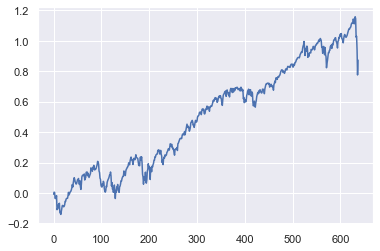

In [128]:
neg = len(sp500[sp500.shift_returns < 0])
pos = len(sp500[sp500.shift_returns > 0])
under_df = sp500[sp500.shift_returns < 0].sample(pos-neg) 
sp500 = pd.concat([under_df, sp500])
sp500.reset_index().returns.cumsum().plot()

In [129]:
sp500.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change', 'price', 'returns',
       'ROC_2', 'ROC_3', 'ROC_5', 'ROC_20', 'ROC_50', 'abs_returns', 'atr_5',
       'atr_20', 'atr_50', 'range', 'adj_close', 'shift_returns'],
      dtype='object')

In [130]:
sp500.drop(columns=['Close', 'Open', 'High', 'Low', 'Volume', 'price', 'range', 'adj_close', 'Change'], inplace=True)

In [131]:
from sklearn import preprocessing

In [132]:

X = sp500.drop(columns='shift_returns')
y = sp500['shift_returns']

X = X.select_dtypes('number')

y = np.sign(y)
#y = y.astype('category')
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train=X.iloc[:-60]
y_train = y[:-60]
X_test = X.iloc[-50:]
y_test = y[-50:]


min_max_scaler = preprocessing.StandardScaler() #MinMaxScaler()
#X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.10, random_state=42)
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)


In [133]:
from sklearn import preprocessing

In [134]:
le.classes_

array([-1.,  1.])

In [ ]:
from keras.layers import Dropout
from keras.constraints import maxnorm

In [136]:
X_train.shape

(578, 10)

In [137]:
def build_model():
    model = Sequential()
 #   model.add(Dropout(0.2, input_shape=(19,)))
    
    model.add(Dense(units=100, activation='tanh', kernel_initializer='random_uniform', bias_initializer='ones',  input_shape=(10,))) # kernel_constraint=maxnorm(3),
    model.add(Dense(units=50, activation='tanh', kernel_initializer='random_uniform', bias_initializer='ones'))
    model.add(Dense(units=11, activation='tanh', kernel_initializer='random_uniform', bias_initializer='ones'))
    model.add(Dense(units=5, activation='tanh', kernel_initializer='random_uniform', bias_initializer='ones')) # kernel_constraint=maxnorm(3),
    
    model.add(Dense(units=3, activation='tanh', kernel_initializer='random_uniform', bias_initializer='ones'))
   
 #   model.add(Dropout(0.2, input_shape=(19,)))
    model.add(Dense(units=2, kernel_initializer='random_uniform', bias_initializer='ones',activation='tanh')) # kernel_constraint=maxnorm(3), 
    model.add(Dense(units=1, kernel_initializer='random_uniform', bias_initializer='ones', activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    return model

In [144]:
def build_model_simple():
    model = Sequential()
    
    
    model.add(Dense(units=11, kernel_initializer='uniform', activation='relu', bias_initializer='ones', input_shape=(10,)))
    model.add(Dense(units=5, kernel_initializer='uniform', bias_initializer='ones', activation='relu'))
    model.add(Dense(units=2, kernel_initializer='uniform', bias_initializer='ones', activation='relu'))
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    return model

In [139]:
model = build_model()


In [140]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 11)                561       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 60        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [141]:
np.bincount(y_test)

array([21, 29], dtype=int64)

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 1000, random_state=0, criterion='entropy', n_jobs=-1)


In [24]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
clf.score(X_test, y_test)

0.7

In [114]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(3, 2, 1), max_iter=10000, alpha=0.00001, # 10, 2, 1 best 62%
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001) # lbfgs

In [115]:
clf

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=10, warm_start=False)

In [116]:
clf.fit(X_train, y_train)

Iteration 1, loss = 0.89750356
Iteration 2, loss = 0.89315392
Iteration 3, loss = 0.88686237
Iteration 4, loss = 0.87910801
Iteration 5, loss = 0.87009978
Iteration 6, loss = 0.86217919
Iteration 7, loss = 0.85201393
Iteration 8, loss = 0.84331113
Iteration 9, loss = 0.83486115
Iteration 10, loss = 0.82729894
Iteration 11, loss = 0.81919940
Iteration 12, loss = 0.81147488
Iteration 13, loss = 0.80471888
Iteration 14, loss = 0.79800286
Iteration 15, loss = 0.79237362
Iteration 16, loss = 0.78693252
Iteration 17, loss = 0.78128950
Iteration 18, loss = 0.77638207
Iteration 19, loss = 0.77188269
Iteration 20, loss = 0.76772481
Iteration 21, loss = 0.76342883
Iteration 22, loss = 0.75955079
Iteration 23, loss = 0.75636805
Iteration 24, loss = 0.75296259
Iteration 25, loss = 0.74993225
Iteration 26, loss = 0.74720308
Iteration 27, loss = 0.74438773
Iteration 28, loss = 0.74202737
Iteration 29, loss = 0.73948250
Iteration 30, loss = 0.73732517
Iteration 31, loss = 0.73519453
Iteration 32, los

Iteration 359, loss = 0.69026506
Iteration 360, loss = 0.69026049
Iteration 361, loss = 0.69025167
Iteration 362, loss = 0.69024316
Iteration 363, loss = 0.69024285
Iteration 364, loss = 0.69023259
Iteration 365, loss = 0.69022305
Iteration 366, loss = 0.69021912
Iteration 367, loss = 0.69021412
Iteration 368, loss = 0.69020228
Iteration 369, loss = 0.69019756
Iteration 370, loss = 0.69018745
Iteration 371, loss = 0.69018403
Iteration 372, loss = 0.69017250
Iteration 373, loss = 0.69016634
Iteration 374, loss = 0.69016095
Iteration 375, loss = 0.69015131
Iteration 376, loss = 0.69014635
Iteration 377, loss = 0.69013698
Iteration 378, loss = 0.69012942
Iteration 379, loss = 0.69012429
Iteration 380, loss = 0.69011610
Iteration 381, loss = 0.69011090
Iteration 382, loss = 0.69010277
Iteration 383, loss = 0.69009580
Iteration 384, loss = 0.69008954
Iteration 385, loss = 0.69008402
Iteration 386, loss = 0.69007544
Iteration 387, loss = 0.69006835
Iteration 388, loss = 0.69006270
Iteration 

Iteration 715, loss = 0.68888005
Iteration 716, loss = 0.68887578
Iteration 717, loss = 0.68887421
Iteration 718, loss = 0.68888227
Iteration 719, loss = 0.68887225
Iteration 720, loss = 0.68886808
Iteration 721, loss = 0.68886638
Iteration 722, loss = 0.68886515
Iteration 723, loss = 0.68886596
Iteration 724, loss = 0.68886376
Iteration 725, loss = 0.68885887
Iteration 726, loss = 0.68886470
Iteration 727, loss = 0.68885609
Iteration 728, loss = 0.68885255
Iteration 729, loss = 0.68885158
Iteration 730, loss = 0.68884867
Iteration 731, loss = 0.68884611
Iteration 732, loss = 0.68884617
Iteration 733, loss = 0.68884336
Iteration 734, loss = 0.68884201
Iteration 735, loss = 0.68883916
Iteration 736, loss = 0.68883623
Iteration 737, loss = 0.68883445
Iteration 738, loss = 0.68883197
Iteration 739, loss = 0.68883246
Iteration 740, loss = 0.68883364
Iteration 741, loss = 0.68882922
Iteration 742, loss = 0.68882696
Iteration 743, loss = 0.68882744
Iteration 744, loss = 0.68882816
Iteration 

Iteration 1072, loss = 0.68840383
Iteration 1073, loss = 0.68840471
Iteration 1074, loss = 0.68840497
Iteration 1075, loss = 0.68840290
Iteration 1076, loss = 0.68840290
Iteration 1077, loss = 0.68839630
Iteration 1078, loss = 0.68839686
Iteration 1079, loss = 0.68840050
Iteration 1080, loss = 0.68839476
Iteration 1081, loss = 0.68839268
Iteration 1082, loss = 0.68839127
Iteration 1083, loss = 0.68839118
Iteration 1084, loss = 0.68839478
Iteration 1085, loss = 0.68838697
Iteration 1086, loss = 0.68838752
Iteration 1087, loss = 0.68838423
Iteration 1088, loss = 0.68838789
Iteration 1089, loss = 0.68838286
Iteration 1090, loss = 0.68837996
Iteration 1091, loss = 0.68838176
Iteration 1092, loss = 0.68837979
Iteration 1093, loss = 0.68837745
Iteration 1094, loss = 0.68837847
Iteration 1095, loss = 0.68837941
Iteration 1096, loss = 0.68837508
Iteration 1097, loss = 0.68837391
Iteration 1098, loss = 0.68837062
Iteration 1099, loss = 0.68837376
Iteration 1100, loss = 0.68837387
Iteration 1101

Iteration 1402, loss = 0.68783170
Iteration 1403, loss = 0.68782712
Iteration 1404, loss = 0.68782081
Iteration 1405, loss = 0.68781716
Iteration 1406, loss = 0.68781965
Iteration 1407, loss = 0.68781533
Iteration 1408, loss = 0.68781023
Iteration 1409, loss = 0.68780710
Iteration 1410, loss = 0.68780430
Iteration 1411, loss = 0.68780155
Iteration 1412, loss = 0.68779926
Iteration 1413, loss = 0.68780184
Iteration 1414, loss = 0.68779683
Iteration 1415, loss = 0.68779054
Iteration 1416, loss = 0.68779369
Iteration 1417, loss = 0.68778581
Iteration 1418, loss = 0.68778163
Iteration 1419, loss = 0.68778160
Iteration 1420, loss = 0.68778022
Iteration 1421, loss = 0.68777620
Iteration 1422, loss = 0.68777304
Iteration 1423, loss = 0.68776815
Iteration 1424, loss = 0.68776518
Iteration 1425, loss = 0.68776253
Iteration 1426, loss = 0.68776221
Iteration 1427, loss = 0.68776221
Iteration 1428, loss = 0.68775870
Iteration 1429, loss = 0.68775671
Iteration 1430, loss = 0.68775084
Iteration 1431

Iteration 1645, loss = 0.68725540
Iteration 1646, loss = 0.68725335
Iteration 1647, loss = 0.68725029
Iteration 1648, loss = 0.68724574
Iteration 1649, loss = 0.68724644
Iteration 1650, loss = 0.68724182
Iteration 1651, loss = 0.68724141
Iteration 1652, loss = 0.68723602
Iteration 1653, loss = 0.68723537
Iteration 1654, loss = 0.68723439
Iteration 1655, loss = 0.68723399
Iteration 1656, loss = 0.68723040
Iteration 1657, loss = 0.68722741
Iteration 1658, loss = 0.68722702
Iteration 1659, loss = 0.68722235
Iteration 1660, loss = 0.68722263
Iteration 1661, loss = 0.68721879
Iteration 1662, loss = 0.68721594
Iteration 1663, loss = 0.68721565
Iteration 1664, loss = 0.68721228
Iteration 1665, loss = 0.68721556
Iteration 1666, loss = 0.68720966
Iteration 1667, loss = 0.68720570
Iteration 1668, loss = 0.68720698
Iteration 1669, loss = 0.68720174
Iteration 1670, loss = 0.68720023
Iteration 1671, loss = 0.68719663
Iteration 1672, loss = 0.68719372
Iteration 1673, loss = 0.68719485
Iteration 1674

Iteration 1997, loss = 0.68651436
Iteration 1998, loss = 0.68651148
Iteration 1999, loss = 0.68651057
Iteration 2000, loss = 0.68650824
Iteration 2001, loss = 0.68650733
Iteration 2002, loss = 0.68650412
Iteration 2003, loss = 0.68650169
Iteration 2004, loss = 0.68650378
Iteration 2005, loss = 0.68649943
Iteration 2006, loss = 0.68650373
Iteration 2007, loss = 0.68649413
Iteration 2008, loss = 0.68649464
Iteration 2009, loss = 0.68648955
Iteration 2010, loss = 0.68648875
Iteration 2011, loss = 0.68648502
Iteration 2012, loss = 0.68649397
Iteration 2013, loss = 0.68648388
Iteration 2014, loss = 0.68647975
Iteration 2015, loss = 0.68648092
Iteration 2016, loss = 0.68647784
Iteration 2017, loss = 0.68647875
Iteration 2018, loss = 0.68647225
Iteration 2019, loss = 0.68647204
Iteration 2020, loss = 0.68647685
Iteration 2021, loss = 0.68646956
Iteration 2022, loss = 0.68646494
Iteration 2023, loss = 0.68646321
Iteration 2024, loss = 0.68646289
Iteration 2025, loss = 0.68646165
Iteration 2026

Iteration 2238, loss = 0.68608533
Iteration 2239, loss = 0.68608594
Iteration 2240, loss = 0.68608088
Iteration 2241, loss = 0.68607968
Iteration 2242, loss = 0.68607703
Iteration 2243, loss = 0.68607598
Iteration 2244, loss = 0.68607561
Iteration 2245, loss = 0.68607618
Iteration 2246, loss = 0.68607287
Iteration 2247, loss = 0.68607003
Iteration 2248, loss = 0.68607422
Iteration 2249, loss = 0.68606605
Iteration 2250, loss = 0.68606468
Iteration 2251, loss = 0.68606246
Iteration 2252, loss = 0.68606089
Iteration 2253, loss = 0.68606281
Iteration 2254, loss = 0.68606171
Iteration 2255, loss = 0.68605465
Iteration 2256, loss = 0.68605250
Iteration 2257, loss = 0.68605117
Iteration 2258, loss = 0.68605013
Iteration 2259, loss = 0.68604772
Iteration 2260, loss = 0.68605807
Iteration 2261, loss = 0.68604699
Iteration 2262, loss = 0.68604600
Iteration 2263, loss = 0.68604176
Iteration 2264, loss = 0.68604080
Iteration 2265, loss = 0.68603834
Iteration 2266, loss = 0.68603739
Iteration 2267

Iteration 2586, loss = 0.68553350
Iteration 2587, loss = 0.68553477
Iteration 2588, loss = 0.68553674
Iteration 2589, loss = 0.68552894
Iteration 2590, loss = 0.68552879
Iteration 2591, loss = 0.68552416
Iteration 2592, loss = 0.68552617
Iteration 2593, loss = 0.68552751
Iteration 2594, loss = 0.68552172
Iteration 2595, loss = 0.68552001
Iteration 2596, loss = 0.68551912
Iteration 2597, loss = 0.68552056
Iteration 2598, loss = 0.68551647
Iteration 2599, loss = 0.68551565
Iteration 2600, loss = 0.68551229
Iteration 2601, loss = 0.68551393
Iteration 2602, loss = 0.68551264
Iteration 2603, loss = 0.68550918
Iteration 2604, loss = 0.68550885
Iteration 2605, loss = 0.68550516
Iteration 2606, loss = 0.68551141
Iteration 2607, loss = 0.68550308
Iteration 2608, loss = 0.68550083
Iteration 2609, loss = 0.68550155
Iteration 2610, loss = 0.68549842
Iteration 2611, loss = 0.68549847
Iteration 2612, loss = 0.68549724
Iteration 2613, loss = 0.68549547
Iteration 2614, loss = 0.68549335
Iteration 2615

Iteration 2918, loss = 0.68505224
Iteration 2919, loss = 0.68504724
Iteration 2920, loss = 0.68504424
Iteration 2921, loss = 0.68504078
Iteration 2922, loss = 0.68504056
Iteration 2923, loss = 0.68504554
Iteration 2924, loss = 0.68503647
Iteration 2925, loss = 0.68503667
Iteration 2926, loss = 0.68503722
Iteration 2927, loss = 0.68503297
Iteration 2928, loss = 0.68503377
Iteration 2929, loss = 0.68503665
Iteration 2930, loss = 0.68502634
Iteration 2931, loss = 0.68502535
Iteration 2932, loss = 0.68502312
Iteration 2933, loss = 0.68502206
Iteration 2934, loss = 0.68502078
Iteration 2935, loss = 0.68502018
Iteration 2936, loss = 0.68501723
Iteration 2937, loss = 0.68501568
Iteration 2938, loss = 0.68501604
Iteration 2939, loss = 0.68501428
Iteration 2940, loss = 0.68501190
Iteration 2941, loss = 0.68500953
Iteration 2942, loss = 0.68500809
Iteration 2943, loss = 0.68500609
Iteration 2944, loss = 0.68500552
Iteration 2945, loss = 0.68501002
Iteration 2946, loss = 0.68500395
Iteration 2947

Iteration 3274, loss = 0.68433705
Iteration 3275, loss = 0.68434253
Iteration 3276, loss = 0.68433421
Iteration 3277, loss = 0.68433342
Iteration 3278, loss = 0.68433211
Iteration 3279, loss = 0.68432642
Iteration 3280, loss = 0.68432566
Iteration 3281, loss = 0.68432320
Iteration 3282, loss = 0.68432152
Iteration 3283, loss = 0.68431720
Iteration 3284, loss = 0.68431628
Iteration 3285, loss = 0.68431287
Iteration 3286, loss = 0.68431065
Iteration 3287, loss = 0.68430783
Iteration 3288, loss = 0.68430666
Iteration 3289, loss = 0.68430395
Iteration 3290, loss = 0.68430323
Iteration 3291, loss = 0.68429864
Iteration 3292, loss = 0.68429953
Iteration 3293, loss = 0.68429787
Iteration 3294, loss = 0.68429220
Iteration 3295, loss = 0.68429100
Iteration 3296, loss = 0.68428920
Iteration 3297, loss = 0.68428706
Iteration 3298, loss = 0.68428417
Iteration 3299, loss = 0.68428278
Iteration 3300, loss = 0.68428141
Iteration 3301, loss = 0.68427713
Iteration 3302, loss = 0.68427847
Iteration 3303

Iteration 3612, loss = 0.68359841
Iteration 3613, loss = 0.68359434
Iteration 3614, loss = 0.68360130
Iteration 3615, loss = 0.68359023
Iteration 3616, loss = 0.68359006
Iteration 3617, loss = 0.68358728
Iteration 3618, loss = 0.68358423
Iteration 3619, loss = 0.68358013
Iteration 3620, loss = 0.68358075
Iteration 3621, loss = 0.68357663
Iteration 3622, loss = 0.68357725
Iteration 3623, loss = 0.68357194
Iteration 3624, loss = 0.68357184
Iteration 3625, loss = 0.68356689
Iteration 3626, loss = 0.68356347
Iteration 3627, loss = 0.68356119
Iteration 3628, loss = 0.68356040
Iteration 3629, loss = 0.68356078
Iteration 3630, loss = 0.68355350
Iteration 3631, loss = 0.68355091
Iteration 3632, loss = 0.68354921
Iteration 3633, loss = 0.68354713
Iteration 3634, loss = 0.68354333
Iteration 3635, loss = 0.68354385
Iteration 3636, loss = 0.68353966
Iteration 3637, loss = 0.68353707
Iteration 3638, loss = 0.68353490
Iteration 3639, loss = 0.68353232
Iteration 3640, loss = 0.68353361
Iteration 3641

Iteration 3953, loss = 0.68244023
Iteration 3954, loss = 0.68243705
Iteration 3955, loss = 0.68243497
Iteration 3956, loss = 0.68242923
Iteration 3957, loss = 0.68242549
Iteration 3958, loss = 0.68242013
Iteration 3959, loss = 0.68242309
Iteration 3960, loss = 0.68241664
Iteration 3961, loss = 0.68241263
Iteration 3962, loss = 0.68240495
Iteration 3963, loss = 0.68240082
Iteration 3964, loss = 0.68239870
Iteration 3965, loss = 0.68239203
Iteration 3966, loss = 0.68238679
Iteration 3967, loss = 0.68238635
Iteration 3968, loss = 0.68238090
Iteration 3969, loss = 0.68237528
Iteration 3970, loss = 0.68237232
Iteration 3971, loss = 0.68236726
Iteration 3972, loss = 0.68236289
Iteration 3973, loss = 0.68235718
Iteration 3974, loss = 0.68235624
Iteration 3975, loss = 0.68235507
Iteration 3976, loss = 0.68234355
Iteration 3977, loss = 0.68233814
Iteration 3978, loss = 0.68233389
Iteration 3979, loss = 0.68233175
Iteration 3980, loss = 0.68232807
Iteration 3981, loss = 0.68232312
Iteration 3982

Iteration 4298, loss = 0.68088880
Iteration 4299, loss = 0.68088073
Iteration 4300, loss = 0.68087611
Iteration 4301, loss = 0.68087275
Iteration 4302, loss = 0.68086876
Iteration 4303, loss = 0.68086229
Iteration 4304, loss = 0.68087495
Iteration 4305, loss = 0.68085223
Iteration 4306, loss = 0.68084655
Iteration 4307, loss = 0.68085578
Iteration 4308, loss = 0.68085223
Iteration 4309, loss = 0.68083315
Iteration 4310, loss = 0.68082858
Iteration 4311, loss = 0.68082326
Iteration 4312, loss = 0.68081842
Iteration 4313, loss = 0.68081043
Iteration 4314, loss = 0.68080976
Iteration 4315, loss = 0.68080442
Iteration 4316, loss = 0.68080175
Iteration 4317, loss = 0.68079213
Iteration 4318, loss = 0.68078690
Iteration 4319, loss = 0.68078158
Iteration 4320, loss = 0.68077774
Iteration 4321, loss = 0.68077799
Iteration 4322, loss = 0.68076743
Iteration 4323, loss = 0.68076898
Iteration 4324, loss = 0.68075895
Iteration 4325, loss = 0.68075541
Iteration 4326, loss = 0.68076030
Iteration 4327

Iteration 4651, loss = 0.67898094
Iteration 4652, loss = 0.67898121
Iteration 4653, loss = 0.67897637
Iteration 4654, loss = 0.67896455
Iteration 4655, loss = 0.67896060
Iteration 4656, loss = 0.67895722
Iteration 4657, loss = 0.67896646
Iteration 4658, loss = 0.67895098
Iteration 4659, loss = 0.67894101
Iteration 4660, loss = 0.67894451
Iteration 4661, loss = 0.67893005
Iteration 4662, loss = 0.67892467
Iteration 4663, loss = 0.67892406
Iteration 4664, loss = 0.67891432
Iteration 4665, loss = 0.67890566
Iteration 4666, loss = 0.67890230
Iteration 4667, loss = 0.67891181
Iteration 4668, loss = 0.67889076
Iteration 4669, loss = 0.67889480
Iteration 4670, loss = 0.67888278
Iteration 4671, loss = 0.67887609
Iteration 4672, loss = 0.67887345
Iteration 4673, loss = 0.67886565
Iteration 4674, loss = 0.67886547
Iteration 4675, loss = 0.67886030
Iteration 4676, loss = 0.67885340
Iteration 4677, loss = 0.67885106
Iteration 4678, loss = 0.67883890
Iteration 4679, loss = 0.67883564
Iteration 4680

Iteration 5000, loss = 0.67708064
Iteration 5001, loss = 0.67707461
Iteration 5002, loss = 0.67706567
Iteration 5003, loss = 0.67705869
Iteration 5004, loss = 0.67705343
Iteration 5005, loss = 0.67704972
Iteration 5006, loss = 0.67704814
Iteration 5007, loss = 0.67705960
Iteration 5008, loss = 0.67703773
Iteration 5009, loss = 0.67703496
Iteration 5010, loss = 0.67702658
Iteration 5011, loss = 0.67701778
Iteration 5012, loss = 0.67701199
Iteration 5013, loss = 0.67700783
Iteration 5014, loss = 0.67700683
Iteration 5015, loss = 0.67699829
Iteration 5016, loss = 0.67699871
Iteration 5017, loss = 0.67699074
Iteration 5018, loss = 0.67698584
Iteration 5019, loss = 0.67698232
Iteration 5020, loss = 0.67697319
Iteration 5021, loss = 0.67696847
Iteration 5022, loss = 0.67696384
Iteration 5023, loss = 0.67695548
Iteration 5024, loss = 0.67695805
Iteration 5025, loss = 0.67694451
Iteration 5026, loss = 0.67694129
Iteration 5027, loss = 0.67693581
Iteration 5028, loss = 0.67693002
Iteration 5029

Iteration 5355, loss = 0.67549348
Iteration 5356, loss = 0.67549182
Iteration 5357, loss = 0.67548186
Iteration 5358, loss = 0.67547980
Iteration 5359, loss = 0.67547226
Iteration 5360, loss = 0.67548852
Iteration 5361, loss = 0.67546363
Iteration 5362, loss = 0.67546209
Iteration 5363, loss = 0.67546349
Iteration 5364, loss = 0.67544900
Iteration 5365, loss = 0.67544922
Iteration 5366, loss = 0.67544359
Iteration 5367, loss = 0.67544041
Iteration 5368, loss = 0.67542976
Iteration 5369, loss = 0.67542971
Iteration 5370, loss = 0.67542414
Iteration 5371, loss = 0.67541988
Iteration 5372, loss = 0.67541315
Iteration 5373, loss = 0.67541049
Iteration 5374, loss = 0.67540298
Iteration 5375, loss = 0.67540224
Iteration 5376, loss = 0.67539493
Iteration 5377, loss = 0.67538942
Iteration 5378, loss = 0.67538551
Iteration 5379, loss = 0.67537839
Iteration 5380, loss = 0.67538011
Iteration 5381, loss = 0.67537062
Iteration 5382, loss = 0.67536383
Iteration 5383, loss = 0.67536382
Iteration 5384

Iteration 5708, loss = 0.67367737
Iteration 5709, loss = 0.67366203
Iteration 5710, loss = 0.67366707
Iteration 5711, loss = 0.67365949
Iteration 5712, loss = 0.67365169
Iteration 5713, loss = 0.67364380
Iteration 5714, loss = 0.67364084
Iteration 5715, loss = 0.67363920
Iteration 5716, loss = 0.67363028
Iteration 5717, loss = 0.67363990
Iteration 5718, loss = 0.67362043
Iteration 5719, loss = 0.67361775
Iteration 5720, loss = 0.67361319
Iteration 5721, loss = 0.67360463
Iteration 5722, loss = 0.67359833
Iteration 5723, loss = 0.67360455
Iteration 5724, loss = 0.67358905
Iteration 5725, loss = 0.67358819
Iteration 5726, loss = 0.67359187
Iteration 5727, loss = 0.67357523
Iteration 5728, loss = 0.67357991
Iteration 5729, loss = 0.67356453
Iteration 5730, loss = 0.67355993
Iteration 5731, loss = 0.67355701
Iteration 5732, loss = 0.67355282
Iteration 5733, loss = 0.67354181
Iteration 5734, loss = 0.67354343
Iteration 5735, loss = 0.67353592
Iteration 5736, loss = 0.67353412
Iteration 5737

Iteration 6062, loss = 0.67183726
Iteration 6063, loss = 0.67182514
Iteration 6064, loss = 0.67181748
Iteration 6065, loss = 0.67181300
Iteration 6066, loss = 0.67180657
Iteration 6067, loss = 0.67180717
Iteration 6068, loss = 0.67179391
Iteration 6069, loss = 0.67178486
Iteration 6070, loss = 0.67177829
Iteration 6071, loss = 0.67178405
Iteration 6072, loss = 0.67177208
Iteration 6073, loss = 0.67176795
Iteration 6074, loss = 0.67175211
Iteration 6075, loss = 0.67174516
Iteration 6076, loss = 0.67174306
Iteration 6077, loss = 0.67173084
Iteration 6078, loss = 0.67173115
Iteration 6079, loss = 0.67171976
Iteration 6080, loss = 0.67171159
Iteration 6081, loss = 0.67170687
Iteration 6082, loss = 0.67169693
Iteration 6083, loss = 0.67169289
Iteration 6084, loss = 0.67168558
Iteration 6085, loss = 0.67167821
Iteration 6086, loss = 0.67166930
Iteration 6087, loss = 0.67166642
Iteration 6088, loss = 0.67165758
Iteration 6089, loss = 0.67165547
Iteration 6090, loss = 0.67164283
Iteration 6091

Iteration 6419, loss = 0.66939563
Iteration 6420, loss = 0.66938649
Iteration 6421, loss = 0.66938212
Iteration 6422, loss = 0.66937160
Iteration 6423, loss = 0.66937294
Iteration 6424, loss = 0.66935597
Iteration 6425, loss = 0.66934580
Iteration 6426, loss = 0.66934242
Iteration 6427, loss = 0.66933146
Iteration 6428, loss = 0.66931876
Iteration 6429, loss = 0.66931654
Iteration 6430, loss = 0.66930480
Iteration 6431, loss = 0.66930373
Iteration 6432, loss = 0.66928221
Iteration 6433, loss = 0.66927715
Iteration 6434, loss = 0.66927108
Iteration 6435, loss = 0.66925832
Iteration 6436, loss = 0.66926243
Iteration 6437, loss = 0.66924499
Iteration 6438, loss = 0.66924541
Iteration 6439, loss = 0.66922686
Iteration 6440, loss = 0.66922336
Iteration 6441, loss = 0.66921755
Iteration 6442, loss = 0.66920862
Iteration 6443, loss = 0.66921147
Iteration 6444, loss = 0.66919455
Iteration 6445, loss = 0.66918286
Iteration 6446, loss = 0.66917569
Iteration 6447, loss = 0.66917030
Iteration 6448

Iteration 6770, loss = 0.66730102
Iteration 6771, loss = 0.66729571
Iteration 6772, loss = 0.66729933
Iteration 6773, loss = 0.66728233
Iteration 6774, loss = 0.66727875
Iteration 6775, loss = 0.66727030
Iteration 6776, loss = 0.66728073
Iteration 6777, loss = 0.66725808
Iteration 6778, loss = 0.66725427
Iteration 6779, loss = 0.66725014
Iteration 6780, loss = 0.66725260
Iteration 6781, loss = 0.66723717
Iteration 6782, loss = 0.66723656
Iteration 6783, loss = 0.66723665
Iteration 6784, loss = 0.66722011
Iteration 6785, loss = 0.66721331
Iteration 6786, loss = 0.66721741
Iteration 6787, loss = 0.66720613
Iteration 6788, loss = 0.66720387
Iteration 6789, loss = 0.66719480
Iteration 6790, loss = 0.66718505
Iteration 6791, loss = 0.66718360
Iteration 6792, loss = 0.66717412
Iteration 6793, loss = 0.66718515
Iteration 6794, loss = 0.66716470
Iteration 6795, loss = 0.66715736
Iteration 6796, loss = 0.66715922
Iteration 6797, loss = 0.66715210
Iteration 6798, loss = 0.66714306
Iteration 6799

Iteration 7119, loss = 0.66532503
Iteration 7120, loss = 0.66532169
Iteration 7121, loss = 0.66531328
Iteration 7122, loss = 0.66531074
Iteration 7123, loss = 0.66529828
Iteration 7124, loss = 0.66529457
Iteration 7125, loss = 0.66528613
Iteration 7126, loss = 0.66528255
Iteration 7127, loss = 0.66527960
Iteration 7128, loss = 0.66527280
Iteration 7129, loss = 0.66526563
Iteration 7130, loss = 0.66526122
Iteration 7131, loss = 0.66525502
Iteration 7132, loss = 0.66525295
Iteration 7133, loss = 0.66524829
Iteration 7134, loss = 0.66524952
Iteration 7135, loss = 0.66524544
Iteration 7136, loss = 0.66524596
Iteration 7137, loss = 0.66521970
Iteration 7138, loss = 0.66521780
Iteration 7139, loss = 0.66520979
Iteration 7140, loss = 0.66520611
Iteration 7141, loss = 0.66520224
Iteration 7142, loss = 0.66519307
Iteration 7143, loss = 0.66518634
Iteration 7144, loss = 0.66518576
Iteration 7145, loss = 0.66518054
Iteration 7146, loss = 0.66516834
Iteration 7147, loss = 0.66516591
Iteration 7148

Iteration 7470, loss = 0.66196424
Iteration 7471, loss = 0.66197547
Iteration 7472, loss = 0.66195123
Iteration 7473, loss = 0.66194384
Iteration 7474, loss = 0.66195070
Iteration 7475, loss = 0.66191329
Iteration 7476, loss = 0.66191070
Iteration 7477, loss = 0.66189310
Iteration 7478, loss = 0.66188450
Iteration 7479, loss = 0.66186996
Iteration 7480, loss = 0.66186572
Iteration 7481, loss = 0.66185597
Iteration 7482, loss = 0.66184082
Iteration 7483, loss = 0.66183889
Iteration 7484, loss = 0.66182445
Iteration 7485, loss = 0.66181275
Iteration 7486, loss = 0.66182198
Iteration 7487, loss = 0.66179213
Iteration 7488, loss = 0.66178932
Iteration 7489, loss = 0.66177594
Iteration 7490, loss = 0.66177403
Iteration 7491, loss = 0.66176625
Iteration 7492, loss = 0.66176145
Iteration 7493, loss = 0.66173754
Iteration 7494, loss = 0.66172713
Iteration 7495, loss = 0.66171587
Iteration 7496, loss = 0.66170707
Iteration 7497, loss = 0.66171304
Iteration 7498, loss = 0.66170068
Iteration 7499

Iteration 7820, loss = 0.65856392
Iteration 7821, loss = 0.65857300
Iteration 7822, loss = 0.65855807
Iteration 7823, loss = 0.65857338
Iteration 7824, loss = 0.65854607
Iteration 7825, loss = 0.65853408
Iteration 7826, loss = 0.65852279
Iteration 7827, loss = 0.65853132
Iteration 7828, loss = 0.65851119
Iteration 7829, loss = 0.65851167
Iteration 7830, loss = 0.65850697
Iteration 7831, loss = 0.65850511
Iteration 7832, loss = 0.65848746
Iteration 7833, loss = 0.65848603
Iteration 7834, loss = 0.65848054
Iteration 7835, loss = 0.65847052
Iteration 7836, loss = 0.65846420
Iteration 7837, loss = 0.65846009
Iteration 7838, loss = 0.65845354
Iteration 7839, loss = 0.65845648
Iteration 7840, loss = 0.65843586
Iteration 7841, loss = 0.65844466
Iteration 7842, loss = 0.65842573
Iteration 7843, loss = 0.65842221
Iteration 7844, loss = 0.65842744
Iteration 7845, loss = 0.65840507
Iteration 7846, loss = 0.65840333
Iteration 7847, loss = 0.65839317
Iteration 7848, loss = 0.65838970
Iteration 7849

Iteration 8063, loss = 0.65731261
Iteration 8064, loss = 0.65729933
Iteration 8065, loss = 0.65730205
Iteration 8066, loss = 0.65728855
Iteration 8067, loss = 0.65729262
Iteration 8068, loss = 0.65728282
Iteration 8069, loss = 0.65728343
Iteration 8070, loss = 0.65727764
Iteration 8071, loss = 0.65728341
Iteration 8072, loss = 0.65727686
Iteration 8073, loss = 0.65727448
Iteration 8074, loss = 0.65725880
Iteration 8075, loss = 0.65726192
Iteration 8076, loss = 0.65727549
Iteration 8077, loss = 0.65724735
Iteration 8078, loss = 0.65725979
Iteration 8079, loss = 0.65723889
Iteration 8080, loss = 0.65723708
Iteration 8081, loss = 0.65723079
Iteration 8082, loss = 0.65722467
Iteration 8083, loss = 0.65722925
Iteration 8084, loss = 0.65722967
Iteration 8085, loss = 0.65722350
Iteration 8086, loss = 0.65721551
Iteration 8087, loss = 0.65720796
Iteration 8088, loss = 0.65720630
Iteration 8089, loss = 0.65720967
Iteration 8090, loss = 0.65719124
Iteration 8091, loss = 0.65718742
Iteration 8092

Iteration 8419, loss = 0.65506623
Iteration 8420, loss = 0.65505902
Iteration 8421, loss = 0.65505232
Iteration 8422, loss = 0.65504292
Iteration 8423, loss = 0.65505191
Iteration 8424, loss = 0.65501687
Iteration 8425, loss = 0.65501117
Iteration 8426, loss = 0.65500128
Iteration 8427, loss = 0.65499305
Iteration 8428, loss = 0.65498093
Iteration 8429, loss = 0.65497108
Iteration 8430, loss = 0.65496448
Iteration 8431, loss = 0.65496999
Iteration 8432, loss = 0.65495099
Iteration 8433, loss = 0.65493974
Iteration 8434, loss = 0.65493018
Iteration 8435, loss = 0.65492065
Iteration 8436, loss = 0.65491421
Iteration 8437, loss = 0.65489794
Iteration 8438, loss = 0.65489349
Iteration 8439, loss = 0.65488618
Iteration 8440, loss = 0.65488087
Iteration 8441, loss = 0.65486723
Iteration 8442, loss = 0.65487581
Iteration 8443, loss = 0.65487126
Iteration 8444, loss = 0.65484849
Iteration 8445, loss = 0.65483456
Iteration 8446, loss = 0.65482892
Iteration 8447, loss = 0.65482607
Iteration 8448

Iteration 8771, loss = 0.65234088
Iteration 8772, loss = 0.65231329
Iteration 8773, loss = 0.65229389
Iteration 8774, loss = 0.65227352
Iteration 8775, loss = 0.65226129
Iteration 8776, loss = 0.65225185
Iteration 8777, loss = 0.65224488
Iteration 8778, loss = 0.65224578
Iteration 8779, loss = 0.65221611
Iteration 8780, loss = 0.65220319
Iteration 8781, loss = 0.65219576
Iteration 8782, loss = 0.65220555
Iteration 8783, loss = 0.65218179
Iteration 8784, loss = 0.65215682
Iteration 8785, loss = 0.65214511
Iteration 8786, loss = 0.65213248
Iteration 8787, loss = 0.65212556
Iteration 8788, loss = 0.65210659
Iteration 8789, loss = 0.65210063
Iteration 8790, loss = 0.65210219
Iteration 8791, loss = 0.65207469
Iteration 8792, loss = 0.65207112
Iteration 8793, loss = 0.65204560
Iteration 8794, loss = 0.65204421
Iteration 8795, loss = 0.65202723
Iteration 8796, loss = 0.65201747
Iteration 8797, loss = 0.65201370
Iteration 8798, loss = 0.65200401
Iteration 8799, loss = 0.65198412
Iteration 8800

Iteration 9119, loss = 0.64893729
Iteration 9120, loss = 0.64892947
Iteration 9121, loss = 0.64893954
Iteration 9122, loss = 0.64891749
Iteration 9123, loss = 0.64892055
Iteration 9124, loss = 0.64892203
Iteration 9125, loss = 0.64889790
Iteration 9126, loss = 0.64891777
Iteration 9127, loss = 0.64888754
Iteration 9128, loss = 0.64888860
Iteration 9129, loss = 0.64887624
Iteration 9130, loss = 0.64886635
Iteration 9131, loss = 0.64886309
Iteration 9132, loss = 0.64885048
Iteration 9133, loss = 0.64885895
Iteration 9134, loss = 0.64884398
Iteration 9135, loss = 0.64884303
Iteration 9136, loss = 0.64884210
Iteration 9137, loss = 0.64884408
Iteration 9138, loss = 0.64882187
Iteration 9139, loss = 0.64882474
Iteration 9140, loss = 0.64881031
Iteration 9141, loss = 0.64879741
Iteration 9142, loss = 0.64879833
Iteration 9143, loss = 0.64880616
Iteration 9144, loss = 0.64877759
Iteration 9145, loss = 0.64878703
Iteration 9146, loss = 0.64876991
Iteration 9147, loss = 0.64878378
Iteration 9148

Iteration 9473, loss = 0.64658087
Iteration 9474, loss = 0.64658343
Iteration 9475, loss = 0.64657013
Iteration 9476, loss = 0.64656236
Iteration 9477, loss = 0.64656553
Iteration 9478, loss = 0.64654587
Iteration 9479, loss = 0.64654782
Iteration 9480, loss = 0.64654382
Iteration 9481, loss = 0.64652414
Iteration 9482, loss = 0.64653156
Iteration 9483, loss = 0.64653193
Iteration 9484, loss = 0.64652828
Iteration 9485, loss = 0.64650902
Iteration 9486, loss = 0.64650478
Iteration 9487, loss = 0.64650456
Iteration 9488, loss = 0.64648632
Iteration 9489, loss = 0.64648474
Iteration 9490, loss = 0.64647673
Iteration 9491, loss = 0.64646633
Iteration 9492, loss = 0.64645395
Iteration 9493, loss = 0.64647683
Iteration 9494, loss = 0.64645956
Iteration 9495, loss = 0.64643988
Iteration 9496, loss = 0.64642062
Iteration 9497, loss = 0.64641697
Iteration 9498, loss = 0.64645220
Iteration 9499, loss = 0.64641201
Iteration 9500, loss = 0.64643077
Iteration 9501, loss = 0.64639318
Iteration 9502

Iteration 9828, loss = 0.64435156
Iteration 9829, loss = 0.64434332
Iteration 9830, loss = 0.64432509
Iteration 9831, loss = 0.64434307
Iteration 9832, loss = 0.64432417
Iteration 9833, loss = 0.64432449
Iteration 9834, loss = 0.64431331
Iteration 9835, loss = 0.64430602
Iteration 9836, loss = 0.64429972
Iteration 9837, loss = 0.64428726
Iteration 9838, loss = 0.64427874
Iteration 9839, loss = 0.64427562
Iteration 9840, loss = 0.64427197
Iteration 9841, loss = 0.64427841
Iteration 9842, loss = 0.64427623
Iteration 9843, loss = 0.64425760
Iteration 9844, loss = 0.64426610
Iteration 9845, loss = 0.64426140
Iteration 9846, loss = 0.64423165
Iteration 9847, loss = 0.64425292
Iteration 9848, loss = 0.64422271
Iteration 9849, loss = 0.64422578
Iteration 9850, loss = 0.64421250
Iteration 9851, loss = 0.64422140
Iteration 9852, loss = 0.64420575
Iteration 9853, loss = 0.64419503
Iteration 9854, loss = 0.64418879
Iteration 9855, loss = 0.64418973
Iteration 9856, loss = 0.64417814
Iteration 9857

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=10, warm_start=False)

In [117]:
clf.score(X_test, y_test)

0.6

In [ ]:
clf

In [623]:
model.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_295 (Dense)            (None, 11)                121       
_________________________________________________________________
dense_296 (Dense)            (None, 5)                 60        
_________________________________________________________________
dense_297 (Dense)            (None, 3)                 18        
_________________________________________________________________
dense_298 (Dense)            (None, 2)                 8         
_________________________________________________________________
dense_299 (Dense)            (None, 1)                 3         
Total params: 210
Trainable params: 210
Non-trainable params: 0
_________________________________________________________________


In [631]:
history = model.fit(X_train, y_train,  epochs=500, batch_size=5,  verbose=1) # validation_split=0.1,

Epoch 1/500
538/538 [==============================] - 1s 948us/step - loss: 0.8256 - accuracy: 0.4796
Epoch 2/500
538/538 [==============================] - 0s 658us/step - loss: 0.7817 - accuracy: 0.4796
Epoch 3/500
538/538 [==============================] - 0s 639us/step - loss: 0.7443 - accuracy: 0.4796
Epoch 4/500
538/538 [==============================] - 0s 630us/step - loss: 0.7205 - accuracy: 0.4796
Epoch 5/500
538/538 [==============================] - 0s 645us/step - loss: 0.7072 - accuracy: 0.4796
Epoch 6/500
538/538 [==============================] - 0s 623us/step - loss: 0.7000 - accuracy: 0.4796
Epoch 7/500
538/538 [==============================] - 0s 636us/step - loss: 0.6962 - accuracy: 0.4796
Epoch 8/500
538/538 [==============================] - 0s 692us/step - loss: 0.6947 - accuracy: 0.4796
Epoch 9/500
538/538 [==============================] - 0s 686us/step - loss: 0.6937 - accuracy: 0.4833
Epoch 10/500
538/538 [==============================] - 0s 639us/step - l

538/538 [==============================] - 0s 643us/step - loss: 0.6926 - accuracy: 0.5204
Epoch 158/500
538/538 [==============================] - 0s 645us/step - loss: 0.6926 - accuracy: 0.5204
Epoch 159/500
538/538 [==============================] - 0s 641us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 160/500
538/538 [==============================] - 0s 664us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 161/500
538/538 [==============================] - 0s 645us/step - loss: 0.6926 - accuracy: 0.5204
Epoch 162/500
538/538 [==============================] - 0s 645us/step - loss: 0.6926 - accuracy: 0.5204
Epoch 163/500
538/538 [==============================] - 0s 651us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 164/500
538/538 [==============================] - 0s 649us/step - loss: 0.6926 - accuracy: 0.5204
Epoch 165/500
538/538 [==============================] - 0s 641us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 166/500
538/538 [==============================] - 0s 647us/ste

538/538 [==============================] - 0s 664us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 314/500
538/538 [==============================] - 0s 639us/step - loss: 0.6926 - accuracy: 0.5204
Epoch 315/500
538/538 [==============================] - 0s 656us/step - loss: 0.6927 - accuracy: 0.5204
Epoch 316/500
538/538 [==============================] - 0s 652us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 317/500
538/538 [==============================] - 0s 643us/step - loss: 0.6924 - accuracy: 0.5204
Epoch 318/500
538/538 [==============================] - 0s 647us/step - loss: 0.6926 - accuracy: 0.5204
Epoch 319/500
538/538 [==============================] - 0s 651us/step - loss: 0.6926 - accuracy: 0.5204
Epoch 320/500
538/538 [==============================] - 0s 652us/step - loss: 0.6929 - accuracy: 0.5204
Epoch 321/500
538/538 [==============================] - 0s 656us/step - loss: 0.6928 - accuracy: 0.5204
Epoch 322/500
538/538 [==============================] - 0s 704us/ste

538/538 [==============================] - 0s 664us/step - loss: 0.6927 - accuracy: 0.5204
Epoch 470/500
538/538 [==============================] - 0s 738us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 471/500
538/538 [==============================] - 0s 654us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 472/500
538/538 [==============================] - 0s 632us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 473/500
538/538 [==============================] - 0s 643us/step - loss: 0.6927 - accuracy: 0.5204
Epoch 474/500
538/538 [==============================] - 0s 647us/step - loss: 0.6926 - accuracy: 0.5204
Epoch 475/500
538/538 [==============================] - 0s 643us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 476/500
538/538 [==============================] - 0s 654us/step - loss: 0.6926 - accuracy: 0.5204
Epoch 477/500
538/538 [==============================] - 0s 652us/step - loss: 0.6925 - accuracy: 0.5204
Epoch 478/500
538/538 [==============================] - 0s 639us/ste

In [145]:
model_simple = build_model_simple()

history = model_simple.fit(X_train, y_train, validation_split=0.10, epochs=2000, batch_size=2,  verbose=1) # validation_split=0.05,

Train on 520 samples, validate on 58 samples
Epoch 1/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5231 - val_loss: 0.6984 - val_accuracy: 0.3966
Epoch 2/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5231 - val_loss: 0.7002 - val_accuracy: 0.3966
Epoch 3/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6926 - accuracy: 0.5231 - val_loss: 0.7018 - val_accuracy: 0.3966
Epoch 4/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5231 - val_loss: 0.7036 - val_accuracy: 0.3966
Epoch 5/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5231 - val_loss: 0.7045 - val_accuracy: 0.3966
Epoch 6/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6925 - accuracy: 0.5231 - val_loss: 0.7051 - val_accuracy: 0.3966
Epoch 7/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6924 - accura

520/520 [==============================] - 1s 1ms/step - loss: 0.6593 - accuracy: 0.6308 - val_loss: 0.7069 - val_accuracy: 0.5345
Epoch 114/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6603 - accuracy: 0.6308 - val_loss: 0.7042 - val_accuracy: 0.5517
Epoch 115/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6597 - accuracy: 0.6250 - val_loss: 0.6953 - val_accuracy: 0.5517
Epoch 116/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6601 - accuracy: 0.6250 - val_loss: 0.7096 - val_accuracy: 0.5517
Epoch 117/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6596 - accuracy: 0.6192 - val_loss: 0.7014 - val_accuracy: 0.5517
Epoch 118/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6574 - accuracy: 0.6385 - val_loss: 0.7037 - val_accuracy: 0.5690
Epoch 119/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.6583 - accuracy: 0.6308 - val_loss: 0.6950 - val_accuracy: 

520/520 [==============================] - 1s 1ms/step - loss: 0.5936 - accuracy: 0.7077 - val_loss: 0.7109 - val_accuracy: 0.6207
Epoch 226/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5911 - accuracy: 0.7135 - val_loss: 0.6917 - val_accuracy: 0.6034
Epoch 227/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5932 - accuracy: 0.7019 - val_loss: 0.7241 - val_accuracy: 0.6034
Epoch 228/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5874 - accuracy: 0.7135 - val_loss: 0.7582 - val_accuracy: 0.5862
Epoch 229/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5940 - accuracy: 0.7058 - val_loss: 0.7306 - val_accuracy: 0.5690
Epoch 230/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5861 - accuracy: 0.7058 - val_loss: 0.7525 - val_accuracy: 0.5862
Epoch 231/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5915 - accuracy: 0.7096 - val_loss: 0.7782 - val_accuracy: 

520/520 [==============================] - 1s 1ms/step - loss: 0.5440 - accuracy: 0.7058 - val_loss: 0.7254 - val_accuracy: 0.6034
Epoch 338/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5443 - accuracy: 0.7096 - val_loss: 0.7041 - val_accuracy: 0.5690
Epoch 339/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.5418 - accuracy: 0.7077 - val_loss: 0.7713 - val_accuracy: 0.5862
Epoch 340/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5778 - accuracy: 0.6904 - val_loss: 0.7872 - val_accuracy: 0.5690
Epoch 341/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5733 - accuracy: 0.7038 - val_loss: 0.7361 - val_accuracy: 0.5517
Epoch 342/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7038 - val_loss: 0.7572 - val_accuracy: 0.5517
Epoch 343/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5416 - accuracy: 0.7154 - val_loss: 0.7906 - val_accuracy: 

520/520 [==============================] - 1s 2ms/step - loss: 0.5077 - accuracy: 0.7327 - val_loss: 0.7151 - val_accuracy: 0.6379
Epoch 450/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.5051 - accuracy: 0.7231 - val_loss: 0.7188 - val_accuracy: 0.6207
Epoch 451/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.5002 - accuracy: 0.7423 - val_loss: 0.7289 - val_accuracy: 0.6207
Epoch 452/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.5030 - accuracy: 0.7442 - val_loss: 0.7161 - val_accuracy: 0.6207
Epoch 453/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.5024 - accuracy: 0.7308 - val_loss: 0.7402 - val_accuracy: 0.5862
Epoch 454/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.5024 - accuracy: 0.7346 - val_loss: 0.6982 - val_accuracy: 0.6379
Epoch 455/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.5075 - accuracy: 0.7231 - val_loss: 0.7467 - val_accuracy: 

520/520 [==============================] - 1s 1ms/step - loss: 0.4755 - accuracy: 0.7442 - val_loss: 0.7213 - val_accuracy: 0.5345
Epoch 562/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4872 - accuracy: 0.7500 - val_loss: 0.7247 - val_accuracy: 0.5345
Epoch 563/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4795 - accuracy: 0.7654 - val_loss: 0.7587 - val_accuracy: 0.5345
Epoch 564/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4807 - accuracy: 0.7538 - val_loss: 0.8547 - val_accuracy: 0.5172
Epoch 565/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4817 - accuracy: 0.7462 - val_loss: 0.7323 - val_accuracy: 0.5345
Epoch 566/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4777 - accuracy: 0.7538 - val_loss: 0.7669 - val_accuracy: 0.5172
Epoch 567/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4780 - accuracy: 0.7596 - val_loss: 0.8013 - val_accuracy: 

520/520 [==============================] - 1s 1ms/step - loss: 0.4574 - accuracy: 0.7692 - val_loss: 0.8945 - val_accuracy: 0.5000
Epoch 674/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4626 - accuracy: 0.7558 - val_loss: 0.9587 - val_accuracy: 0.5345
Epoch 675/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4585 - accuracy: 0.7596 - val_loss: 0.8308 - val_accuracy: 0.5345
Epoch 676/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4571 - accuracy: 0.7654 - val_loss: 0.9132 - val_accuracy: 0.5172
Epoch 677/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4500 - accuracy: 0.7692 - val_loss: 0.8439 - val_accuracy: 0.5000
Epoch 678/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4530 - accuracy: 0.7846 - val_loss: 0.9289 - val_accuracy: 0.5000
Epoch 679/2000
520/520 [==============================] - ETA: 0s - loss: 0.4432 - accuracy: 0.76 - 1s 1ms/step - loss: 0.4499 - accuracy: 

Epoch 729/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4722 - accuracy: 0.7635 - val_loss: 1.0443 - val_accuracy: 0.5000
Epoch 730/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4578 - accuracy: 0.7596 - val_loss: 0.9235 - val_accuracy: 0.5517
Epoch 731/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.4450 - accuracy: 0.7846 - val_loss: 0.9854 - val_accuracy: 0.5000
Epoch 732/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4493 - accuracy: 0.7654 - val_loss: 0.9406 - val_accuracy: 0.5000
Epoch 733/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4444 - accuracy: 0.7769 - val_loss: 0.9290 - val_accuracy: 0.5000
Epoch 734/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4455 - accuracy: 0.7712 - val_loss: 0.9482 - val_accuracy: 0.5000
Epoch 735/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4458 - accuracy: 0.7635 - val_loss: 0.9461 -

520/520 [==============================] - 1s 1ms/step - loss: 0.4257 - accuracy: 0.7962 - val_loss: 0.9094 - val_accuracy: 0.5000
Epoch 842/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4303 - accuracy: 0.7904 - val_loss: 0.8158 - val_accuracy: 0.5172
Epoch 843/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4267 - accuracy: 0.7865 - val_loss: 1.0056 - val_accuracy: 0.5000
Epoch 844/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4279 - accuracy: 0.7846 - val_loss: 1.2055 - val_accuracy: 0.4828
Epoch 845/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4318 - accuracy: 0.7769 - val_loss: 1.0385 - val_accuracy: 0.5172
Epoch 846/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.7731 - val_loss: 0.8835 - val_accuracy: 0.5000
Epoch 847/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4329 - accuracy: 0.7827 - val_loss: 0.8703 - val_accuracy: 

520/520 [==============================] - 1s 1ms/step - loss: 0.4093 - accuracy: 0.8000 - val_loss: 0.9149 - val_accuracy: 0.5345
Epoch 954/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4102 - accuracy: 0.7962 - val_loss: 0.8149 - val_accuracy: 0.5517
Epoch 955/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4154 - accuracy: 0.8019 - val_loss: 0.8623 - val_accuracy: 0.5862
Epoch 956/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4173 - accuracy: 0.7962 - val_loss: 1.0194 - val_accuracy: 0.5345
Epoch 957/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4606 - accuracy: 0.7827 - val_loss: 0.9987 - val_accuracy: 0.5345
Epoch 958/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4685 - accuracy: 0.7788 - val_loss: 0.9178 - val_accuracy: 0.5345
Epoch 959/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4232 - accuracy: 0.7923 - val_loss: 0.9641 - val_accuracy: 

Epoch 1065/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3913 - accuracy: 0.7962 - val_loss: 1.0647 - val_accuracy: 0.5517
Epoch 1066/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8058 - val_loss: 1.0580 - val_accuracy: 0.5000
Epoch 1067/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3927 - accuracy: 0.8019 - val_loss: 1.1430 - val_accuracy: 0.5345
Epoch 1068/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4060 - accuracy: 0.7827 - val_loss: 1.0572 - val_accuracy: 0.5517
Epoch 1069/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4280 - accuracy: 0.7808 - val_loss: 1.0512 - val_accuracy: 0.5690
Epoch 1070/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3961 - accuracy: 0.8096 - val_loss: 1.0560 - val_accuracy: 0.5690
Epoch 1071/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4040 - accuracy: 0.7962 - val_loss: 1

Epoch 1121/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3854 - accuracy: 0.8077 - val_loss: 1.1612 - val_accuracy: 0.5517
Epoch 1122/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3868 - accuracy: 0.8115 - val_loss: 1.2090 - val_accuracy: 0.5862
Epoch 1123/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3837 - accuracy: 0.8038 - val_loss: 1.1376 - val_accuracy: 0.5517
Epoch 1124/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3857 - accuracy: 0.8038 - val_loss: 1.1458 - val_accuracy: 0.5172
Epoch 1125/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3909 - accuracy: 0.8000 - val_loss: 1.0910 - val_accuracy: 0.5517
Epoch 1126/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4009 - accuracy: 0.7981 - val_loss: 1.0986 - val_accuracy: 0.5172
Epoch 1127/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3983 - accuracy: 0.8038 - val_loss: 1

Epoch 1177/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3739 - accuracy: 0.8000 - val_loss: 1.0803 - val_accuracy: 0.5862
Epoch 1178/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3970 - accuracy: 0.7962 - val_loss: 1.0275 - val_accuracy: 0.5690
Epoch 1179/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4032 - accuracy: 0.8058 - val_loss: 1.1906 - val_accuracy: 0.5345
Epoch 1180/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3886 - accuracy: 0.8038 - val_loss: 1.1303 - val_accuracy: 0.5517
Epoch 1181/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3868 - accuracy: 0.8115 - val_loss: 1.2427 - val_accuracy: 0.5345
Epoch 1182/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.3932 - accuracy: 0.8038 - val_loss: 1.1841 - val_accuracy: 0.5517
Epoch 1183/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4089 - accuracy: 0.8115 - val_loss: 1

Epoch 1233/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4322 - accuracy: 0.8077 - val_loss: 1.2292 - val_accuracy: 0.5345
Epoch 1234/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4114 - accuracy: 0.8192 - val_loss: 1.4242 - val_accuracy: 0.4828
Epoch 1235/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4148 - accuracy: 0.8000 - val_loss: 1.2931 - val_accuracy: 0.5690
Epoch 1236/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4132 - accuracy: 0.8115 - val_loss: 1.4228 - val_accuracy: 0.4828
Epoch 1237/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4096 - accuracy: 0.8038 - val_loss: 1.2884 - val_accuracy: 0.5000
Epoch 1238/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4113 - accuracy: 0.8038 - val_loss: 1.2517 - val_accuracy: 0.5345
Epoch 1239/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4145 - accuracy: 0.8077 - val_loss: 1

Epoch 1289/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4035 - accuracy: 0.8019 - val_loss: 1.6151 - val_accuracy: 0.4828
Epoch 1290/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3918 - accuracy: 0.8019 - val_loss: 1.3734 - val_accuracy: 0.5690
Epoch 1291/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3937 - accuracy: 0.8038 - val_loss: 1.4491 - val_accuracy: 0.5345
Epoch 1292/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4086 - accuracy: 0.7904 - val_loss: 1.5988 - val_accuracy: 0.5690
Epoch 1293/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4350 - accuracy: 0.8077 - val_loss: 1.4839 - val_accuracy: 0.5172
Epoch 1294/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4258 - accuracy: 0.7885 - val_loss: 1.4253 - val_accuracy: 0.5690
Epoch 1295/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3965 - accuracy: 0.8192 - val_loss: 1

Epoch 1345/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3845 - accuracy: 0.8231 - val_loss: 1.4276 - val_accuracy: 0.5690
Epoch 1346/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3875 - accuracy: 0.8077 - val_loss: 1.3437 - val_accuracy: 0.5690
Epoch 1347/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3877 - accuracy: 0.8154 - val_loss: 1.4395 - val_accuracy: 0.5690
Epoch 1348/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3921 - accuracy: 0.8096 - val_loss: 1.4795 - val_accuracy: 0.5000
Epoch 1349/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3880 - accuracy: 0.8154 - val_loss: 1.3890 - val_accuracy: 0.5345
Epoch 1350/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.3964 - accuracy: 0.8115 - val_loss: 1.4521 - val_accuracy: 0.5000
Epoch 1351/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8077 - val_loss: 1

Epoch 1401/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3652 - accuracy: 0.8269 - val_loss: 1.5356 - val_accuracy: 0.5172
Epoch 1402/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3688 - accuracy: 0.8346 - val_loss: 1.4846 - val_accuracy: 0.5345
Epoch 1403/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3754 - accuracy: 0.8212 - val_loss: 1.3846 - val_accuracy: 0.5862
Epoch 1404/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3717 - accuracy: 0.8192 - val_loss: 1.5153 - val_accuracy: 0.5345
Epoch 1405/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3726 - accuracy: 0.8269 - val_loss: 1.3955 - val_accuracy: 0.5345
Epoch 1406/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3811 - accuracy: 0.8135 - val_loss: 1.5997 - val_accuracy: 0.4828
Epoch 1407/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3770 - accuracy: 0.8154 - val_loss: 1

Epoch 1457/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3715 - accuracy: 0.8231 - val_loss: 1.4683 - val_accuracy: 0.5862
Epoch 1458/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3763 - accuracy: 0.8269 - val_loss: 1.5775 - val_accuracy: 0.5172
Epoch 1459/2000
520/520 [==============================] - 1s 2ms/step - loss: 0.3853 - accuracy: 0.8173 - val_loss: 1.5629 - val_accuracy: 0.5517
Epoch 1460/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3610 - accuracy: 0.8308 - val_loss: 1.7457 - val_accuracy: 0.5517
Epoch 1461/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3582 - accuracy: 0.8288 - val_loss: 1.5542 - val_accuracy: 0.5690
Epoch 1462/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3610 - accuracy: 0.8327 - val_loss: 1.6305 - val_accuracy: 0.5000
Epoch 1463/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3604 - accuracy: 0.8288 - val_loss: 1

Epoch 1513/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3569 - accuracy: 0.8308 - val_loss: 2.0903 - val_accuracy: 0.5000
Epoch 1514/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3518 - accuracy: 0.8288 - val_loss: 1.7382 - val_accuracy: 0.5690
Epoch 1515/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3506 - accuracy: 0.8346 - val_loss: 1.6627 - val_accuracy: 0.5517
Epoch 1516/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3476 - accuracy: 0.8346 - val_loss: 1.8209 - val_accuracy: 0.5000
Epoch 1517/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3938 - accuracy: 0.8269 - val_loss: 1.6844 - val_accuracy: 0.5690
Epoch 1518/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4145 - accuracy: 0.8077 - val_loss: 1.5323 - val_accuracy: 0.5862
Epoch 1519/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4101 - accuracy: 0.8058 - val_loss: 1

Epoch 1569/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3553 - accuracy: 0.8365 - val_loss: 1.9017 - val_accuracy: 0.5517
Epoch 1570/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3578 - accuracy: 0.8250 - val_loss: 1.7313 - val_accuracy: 0.5517
Epoch 1571/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3610 - accuracy: 0.8212 - val_loss: 1.8178 - val_accuracy: 0.5345
Epoch 1572/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3706 - accuracy: 0.8077 - val_loss: 1.7089 - val_accuracy: 0.5690
Epoch 1573/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3924 - accuracy: 0.8115 - val_loss: 2.0661 - val_accuracy: 0.5517
Epoch 1574/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4030 - accuracy: 0.8192 - val_loss: 1.7330 - val_accuracy: 0.5862
Epoch 1575/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.4366 - accuracy: 0.8000 - val_loss: 1

Epoch 1625/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3678 - accuracy: 0.8250 - val_loss: 1.9070 - val_accuracy: 0.5690
Epoch 1626/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3626 - accuracy: 0.8250 - val_loss: 2.0009 - val_accuracy: 0.5690
Epoch 1627/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3534 - accuracy: 0.8308 - val_loss: 2.1132 - val_accuracy: 0.5345
Epoch 1628/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3797 - accuracy: 0.8019 - val_loss: 2.0457 - val_accuracy: 0.5345
Epoch 1629/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3694 - accuracy: 0.8173 - val_loss: 2.0967 - val_accuracy: 0.5862
Epoch 1630/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3637 - accuracy: 0.8231 - val_loss: 2.0358 - val_accuracy: 0.5517
Epoch 1631/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3587 - accuracy: 0.8173 - val_loss: 1

Epoch 1681/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3790 - accuracy: 0.8154 - val_loss: 2.2313 - val_accuracy: 0.5517
Epoch 1682/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3538 - accuracy: 0.8269 - val_loss: 2.1104 - val_accuracy: 0.5690
Epoch 1683/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3430 - accuracy: 0.8269 - val_loss: 2.1991 - val_accuracy: 0.5517
Epoch 1684/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3534 - accuracy: 0.8346 - val_loss: 2.0209 - val_accuracy: 0.6034
Epoch 1685/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3618 - accuracy: 0.8288 - val_loss: 1.9451 - val_accuracy: 0.5690
Epoch 1686/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3587 - accuracy: 0.8231 - val_loss: 2.0609 - val_accuracy: 0.5690
Epoch 1687/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3378 - accuracy: 0.8423 - val_loss: 2

Epoch 1737/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3421 - accuracy: 0.8346 - val_loss: 2.3294 - val_accuracy: 0.5345
Epoch 1738/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3364 - accuracy: 0.8385 - val_loss: 2.5756 - val_accuracy: 0.5345
Epoch 1739/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3606 - accuracy: 0.8288 - val_loss: 2.9104 - val_accuracy: 0.4828
Epoch 1740/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3637 - accuracy: 0.8154 - val_loss: 2.5040 - val_accuracy: 0.5690
Epoch 1741/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3384 - accuracy: 0.8346 - val_loss: 2.0123 - val_accuracy: 0.5345
Epoch 1742/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3411 - accuracy: 0.8327 - val_loss: 2.3091 - val_accuracy: 0.5345
Epoch 1743/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3240 - accuracy: 0.8442 - val_loss: 2

Epoch 1793/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3346 - accuracy: 0.8288 - val_loss: 2.4628 - val_accuracy: 0.5000
Epoch 1794/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3662 - accuracy: 0.8327 - val_loss: 2.3439 - val_accuracy: 0.5517
Epoch 1795/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3396 - accuracy: 0.8327 - val_loss: 2.5044 - val_accuracy: 0.5000
Epoch 1796/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3247 - accuracy: 0.8519 - val_loss: 2.6932 - val_accuracy: 0.5345
Epoch 1797/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3187 - accuracy: 0.8442 - val_loss: 2.4736 - val_accuracy: 0.5345
Epoch 1798/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3413 - accuracy: 0.8346 - val_loss: 2.8504 - val_accuracy: 0.4828
Epoch 1799/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3310 - accuracy: 0.8288 - val_loss: 2

Epoch 1849/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3346 - accuracy: 0.8365 - val_loss: 2.8686 - val_accuracy: 0.5517
Epoch 1850/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3402 - accuracy: 0.8308 - val_loss: 2.4530 - val_accuracy: 0.5517
Epoch 1851/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3544 - accuracy: 0.8346 - val_loss: 2.4756 - val_accuracy: 0.5172
Epoch 1852/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3512 - accuracy: 0.8250 - val_loss: 2.8594 - val_accuracy: 0.5345
Epoch 1853/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3659 - accuracy: 0.8288 - val_loss: 2.6597 - val_accuracy: 0.5517
Epoch 1854/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3441 - accuracy: 0.8288 - val_loss: 2.8408 - val_accuracy: 0.5345
Epoch 1855/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3465 - accuracy: 0.8346 - val_loss: 2

Epoch 1905/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3669 - accuracy: 0.8058 - val_loss: 2.5330 - val_accuracy: 0.5345
Epoch 1906/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3514 - accuracy: 0.8288 - val_loss: 2.8144 - val_accuracy: 0.5172
Epoch 1907/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3857 - accuracy: 0.7942 - val_loss: 2.7733 - val_accuracy: 0.5172
Epoch 1908/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3506 - accuracy: 0.8250 - val_loss: 2.6048 - val_accuracy: 0.5172
Epoch 1909/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3391 - accuracy: 0.8308 - val_loss: 2.8074 - val_accuracy: 0.5000
Epoch 1910/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3358 - accuracy: 0.8288 - val_loss: 3.1344 - val_accuracy: 0.4655
Epoch 1911/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3433 - accuracy: 0.8288 - val_loss: 2

Epoch 1961/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3511 - accuracy: 0.8269 - val_loss: 2.9622 - val_accuracy: 0.5172
Epoch 1962/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3318 - accuracy: 0.8346 - val_loss: 2.4763 - val_accuracy: 0.5517
Epoch 1963/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3241 - accuracy: 0.8423 - val_loss: 2.4427 - val_accuracy: 0.5862
Epoch 1964/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3328 - accuracy: 0.8404 - val_loss: 2.7708 - val_accuracy: 0.5000
Epoch 1965/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3191 - accuracy: 0.8519 - val_loss: 2.8588 - val_accuracy: 0.5000
Epoch 1966/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3516 - accuracy: 0.8269 - val_loss: 2.6685 - val_accuracy: 0.5000
Epoch 1967/2000
520/520 [==============================] - 1s 1ms/step - loss: 0.3456 - accuracy: 0.8269 - val_loss: 2

In [147]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 0s 80us/step


[0.723194694519043, 0.5799999833106995]

In [ ]:
model_simple.evaluate(X_test, y_test)

In [642]:
model_simple.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [143]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [180]:
model.predict(X_test)

array([[0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],
       [0.6102894],


In [179]:
eval_model=model.evaluate(X_train, y_train) # loss value & metrics
print(eval_model)

429/429 [==============================] - 0s 76us/step
[0.6767883127108043, 0.5920745730400085]


In [146]:
from keras.wrappers.scikit_learn import KerasClassifier
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=build_model, epochs=100, batch_size=5, verbose=1)

In [147]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [148]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

Epoch 1/100
386/386 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5907
Epoch 2/100
386/386 [==============================] - 0s 637us/step - loss: 0.6922 - accuracy: 0.5907
Epoch 3/100
386/386 [==============================] - 0s 642us/step - loss: 0.6814 - accuracy: 0.5907
Epoch 4/100
386/386 [==============================] - 0s 627us/step - loss: 0.6860 - accuracy: 0.5907
Epoch 5/100
386/386 [==============================] - 0s 622us/step - loss: 0.6832 - accuracy: 0.5907
Epoch 6/100
386/386 [==============================] - 0s 642us/step - loss: 0.6820 - accuracy: 0.5907
Epoch 7/100
386/386 [==============================] - 0s 643us/step - loss: 0.6829 - accuracy: 0.5907
Epoch 8/100
386/386 [==============================] - 0s 635us/step - loss: 0.6868 - accuracy: 0.5907
Epoch 9/100
386/386 [==============================] - 0s 627us/step - loss: 0.6834 - accuracy: 0.5907
Epoch 10/100
386/386 [==============================] - 0s 627us/step - los

386/386 [==============================] - 0s 668us/step - loss: 0.6770 - accuracy: 0.5907
Epoch 58/100
386/386 [==============================] - 0s 610us/step - loss: 0.6769 - accuracy: 0.5907
Epoch 59/100
386/386 [==============================] - 0s 731us/step - loss: 0.6769 - accuracy: 0.5907
Epoch 60/100
386/386 [==============================] - 0s 697us/step - loss: 0.6769 - accuracy: 0.5907
Epoch 61/100
386/386 [==============================] - 0s 762us/step - loss: 0.6778 - accuracy: 0.5907
Epoch 62/100
386/386 [==============================] - 0s 775us/step - loss: 0.6768 - accuracy: 0.5907
Epoch 63/100
386/386 [==============================] - 0s 676us/step - loss: 0.6767 - accuracy: 0.5907
Epoch 64/100
386/386 [==============================] - 0s 731us/step - loss: 0.6769 - accuracy: 0.5907
Epoch 65/100
386/386 [==============================] - 0s 826us/step - loss: 0.6769 - accuracy: 0.5907
Epoch 66/100
386/386 [==============================] - 0s 813us/step - loss:

386/386 [==============================] - 0s 772us/step - loss: 0.6771 - accuracy: 0.5907
Epoch 36/100
386/386 [==============================] - 0s 699us/step - loss: 0.6764 - accuracy: 0.5907
Epoch 37/100
386/386 [==============================] - 0s 617us/step - loss: 0.6771 - accuracy: 0.5907
Epoch 38/100
386/386 [==============================] - 0s 597us/step - loss: 0.6757 - accuracy: 0.5907
Epoch 39/100
386/386 [==============================] - 0s 591us/step - loss: 0.6774 - accuracy: 0.5907
Epoch 40/100
386/386 [==============================] - 0s 570us/step - loss: 0.6766 - accuracy: 0.5907
Epoch 41/100
386/386 [==============================] - 0s 567us/step - loss: 0.6773 - accuracy: 0.5907
Epoch 42/100
386/386 [==============================] - 0s 624us/step - loss: 0.6800 - accuracy: 0.5907
Epoch 43/100
386/386 [==============================] - 0s 580us/step - loss: 0.6772 - accuracy: 0.5907
Epoch 44/100
386/386 [==============================] - 0s 561us/step - loss:

386/386 [==============================] - 0s 598us/step - loss: 0.6771 - accuracy: 0.5907
Epoch 92/100
386/386 [==============================] - 0s 572us/step - loss: 0.6765 - accuracy: 0.5907
Epoch 93/100
386/386 [==============================] - 0s 565us/step - loss: 0.6768 - accuracy: 0.5907
Epoch 94/100
386/386 [==============================] - 0s 552us/step - loss: 0.6766 - accuracy: 0.5907
Epoch 95/100
386/386 [==============================] - 0s 585us/step - loss: 0.6767 - accuracy: 0.5907
Epoch 96/100
386/386 [==============================] - 0s 570us/step - loss: 0.6767 - accuracy: 0.5907
Epoch 97/100
386/386 [==============================] - 0s 564us/step - loss: 0.6769 - accuracy: 0.5907
Epoch 98/100
386/386 [==============================] - 0s 575us/step - loss: 0.6768 - accuracy: 0.5907
Epoch 99/100
386/386 [==============================] - 0s 585us/step - loss: 0.6767 - accuracy: 0.5907
Epoch 100/100
43/43 [==============================] - 0s 977us/step
Epoch 1/

386/386 [==============================] - 0s 580us/step - loss: 0.6760 - accuracy: 0.5933
Epoch 48/100
386/386 [==============================] - 0s 536us/step - loss: 0.6773 - accuracy: 0.5933
Epoch 49/100
386/386 [==============================] - 0s 565us/step - loss: 0.6759 - accuracy: 0.5933
Epoch 50/100
386/386 [==============================] - 0s 679us/step - loss: 0.6759 - accuracy: 0.5933
Epoch 51/100
386/386 [==============================] - 0s 585us/step - loss: 0.6763 - accuracy: 0.5933
Epoch 52/100
386/386 [==============================] - 0s 566us/step - loss: 0.6761 - accuracy: 0.5933
Epoch 53/100
386/386 [==============================] - 0s 557us/step - loss: 0.6759 - accuracy: 0.5933
Epoch 54/100
386/386 [==============================] - 0s 554us/step - loss: 0.6755 - accuracy: 0.5933
Epoch 55/100
386/386 [==============================] - 0s 593us/step - loss: 0.6772 - accuracy: 0.5933
Epoch 56/100
386/386 [==============================] - 0s 694us/step - loss:

386/386 [==============================] - 0s 583us/step - loss: 0.6821 - accuracy: 0.5933
Epoch 4/100
386/386 [==============================] - 0s 573us/step - loss: 0.6800 - accuracy: 0.5933
Epoch 5/100
386/386 [==============================] - 0s 567us/step - loss: 0.6843 - accuracy: 0.5933
Epoch 6/100
386/386 [==============================] - 0s 578us/step - loss: 0.6771 - accuracy: 0.5933
Epoch 7/100
386/386 [==============================] - 0s 583us/step - loss: 0.6865 - accuracy: 0.5933
Epoch 8/100
386/386 [==============================] - 0s 575us/step - loss: 0.6843 - accuracy: 0.5933
Epoch 9/100
386/386 [==============================] - 0s 557us/step - loss: 0.6842 - accuracy: 0.5933
Epoch 10/100
386/386 [==============================] - 0s 554us/step - loss: 0.6813 - accuracy: 0.5933
Epoch 11/100
386/386 [==============================] - 0s 570us/step - loss: 0.6865 - accuracy: 0.5933
Epoch 12/100
386/386 [==============================] - 0s 593us/step - loss: 0.682

Epoch 82/100
386/386 [==============================] - 0s 554us/step - loss: 0.6757 - accuracy: 0.5933
Epoch 83/100
386/386 [==============================] - 0s 578us/step - loss: 0.6759 - accuracy: 0.5933
Epoch 84/100
386/386 [==============================] - 0s 573us/step - loss: 0.6757 - accuracy: 0.5933
Epoch 85/100
386/386 [==============================] - 0s 591us/step - loss: 0.6758 - accuracy: 0.5933
Epoch 86/100
386/386 [==============================] - 0s 578us/step - loss: 0.6758 - accuracy: 0.5933
Epoch 87/100
386/386 [==============================] - 0s 598us/step - loss: 0.6757 - accuracy: 0.5933
Epoch 88/100
386/386 [==============================] - 0s 599us/step - loss: 0.6758 - accuracy: 0.5933
Epoch 89/100
386/386 [==============================] - 0s 596us/step - loss: 0.6757 - accuracy: 0.5933
Epoch 90/100
386/386 [==============================] - 0s 608us/step - loss: 0.6758 - accuracy: 0.5933
Epoch 91/100
386/386 [==============================] - 0s 617us

387/387 [==============================] - 0s 630us/step - loss: 0.6769 - accuracy: 0.5917
Epoch 39/100
387/387 [==============================] - 0s 610us/step - loss: 0.6778 - accuracy: 0.5917
Epoch 40/100
387/387 [==============================] - 0s 563us/step - loss: 0.6770 - accuracy: 0.5917
Epoch 41/100
387/387 [==============================] - 0s 579us/step - loss: 0.6771 - accuracy: 0.5917
Epoch 42/100
387/387 [==============================] - 0s 557us/step - loss: 0.6770 - accuracy: 0.5917
Epoch 43/100
387/387 [==============================] - 0s 574us/step - loss: 0.6767 - accuracy: 0.5917
Epoch 44/100
387/387 [==============================] - 0s 561us/step - loss: 0.6768 - accuracy: 0.5917
Epoch 45/100
387/387 [==============================] - 0s 574us/step - loss: 0.6769 - accuracy: 0.5917
Epoch 46/100
387/387 [==============================] - 0s 576us/step - loss: 0.6765 - accuracy: 0.5917
Epoch 47/100
387/387 [==============================] - 0s 576us/step - loss:

In [156]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 59.21% (1.10%)


In [157]:
estimator.fit(X_train, y_train) # https://stackoverflow.com/questions/39467496/error-when-using-keras-sk-learn-api

Epoch 1/100
429/429 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5711
Epoch 2/100
429/429 [==============================] - 0s 615us/step - loss: 0.6832 - accuracy: 0.5921
Epoch 3/100
429/429 [==============================] - 0s 604us/step - loss: 0.6821 - accuracy: 0.5921
Epoch 4/100
429/429 [==============================] - 0s 628us/step - loss: 0.6833 - accuracy: 0.5921
Epoch 5/100
429/429 [==============================] - 0s 608us/step - loss: 0.6772 - accuracy: 0.5921
Epoch 6/100
429/429 [==============================] - 0s 597us/step - loss: 0.6840 - accuracy: 0.5921
Epoch 7/100
429/429 [==============================] - 0s 615us/step - loss: 0.6814 - accuracy: 0.5921
Epoch 8/100
429/429 [==============================] - 0s 615us/step - loss: 0.6857 - accuracy: 0.5921
Epoch 9/100
429/429 [==============================] - 0s 776us/step - loss: 0.6796 - accuracy: 0.5921
Epoch 10/100
429/429 [==============================] - 0s 646us/step - los

In [173]:
estimator.predict(X_test)

108/108 [==============================] - 0s 203us/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [68]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __call__() missing 1 required positional argument: 'inputs'

  FitFailedWarning)
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __call__() missing 1 required positional argument: 'inputs'

  FitFailedWarning)
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __call__() missing 1 required positional argument: 'inputs'

  FitFailedWarning)
C:\ProgramData\Anaconda3\envs\tf-gpu\

Standardized: nan% (nan%)


C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __call__() missing 1 required positional argument: 'inputs'

  FitFailedWarning)


In [56]:
# https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

Train: 0.594, Test: 0.594


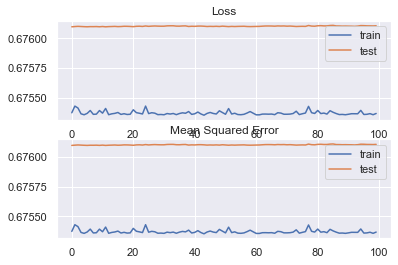

In [114]:
history = model.fit(X, y, validation_data=(X_train, y_train), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(X, y, verbose=0)
_, test_mse = model.evaluate(X, y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot mse during training
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [113]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [55]:
# https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-classification-3a3656c726c1

In [153]:
# https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

In [154]:
# https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/

In [155]:
# https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/